In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train=pd.read_excel("C:/Users/SRISTI/Desktop/practice text doc/doc_cons_final_train.xlsx")
data_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
data_test=pd.read_excel("C:/Users/SRISTI/Desktop/practice text doc/doc_cons_final_test.xlsx")
data_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
dtn=data_train.copy()
dts=data_test.copy()

In [5]:
dtn.shape

(5961, 7)

In [6]:
dts.shape

(1987, 6)

Train dataset has 5961 rows and 7 columns.
Test dataset has 1987 rows and 6 columns.

In [7]:
dtn.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
dts.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [9]:
dtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


Train dataset has all the columns as object type except target variable whic is int type.
Test dataset has all the columns as object type.

In [11]:
dtn.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [12]:
dts.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Train dataset has null values in 3 columns which are Rating,Place and Miscellaneous_info.
Test dataset has also null values in same 3 columns as above.

In [13]:
dtn.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [14]:
dtn.Qualification.nunique()

1420

In [15]:
dtn.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [16]:
dts.Profile.unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

Here we can see that mislleneous info will not that important, most of the information in this column is just about the rating and place which is already present in separate columns therefore we can drop this column.

In [17]:
dtn.drop('Miscellaneous_Info',axis=1,inplace=True)
dts.drop('Miscellaneous_Info',axis=1,inplace=True)

In [18]:
dtn.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [19]:
dts.head()

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist


In [20]:
# We are going to extract year of experience from experience column.

dtn['Experience']=dtn['Experience'].str.split()
dtn['Experience']=dtn['Experience'].str[0].astype(float)

In [21]:
dtn.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24.0,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12.0,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12.0,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20.0,100%,"Keelkattalai, Chennai",Ayurveda,250


In [22]:
dts['Experience']=dts['Experience'].str.split()
dts['Experience']=dts['Experience'].str[0].astype(float)

In [23]:
dts.head()

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35.0,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31.0,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40.0,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0.0,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16.0,100%,"Kanakpura Road, Bangalore",Dentist


In [24]:
# Going to separate place and city from place column.
# First we have to fill that null values.
dtn['Place']=dtn['Place'].fillna(dtn['Place'].mode()[0])
dts['Place']=dts['Place'].fillna(dts['Place'].mode()[0])

In [25]:
dtn['Place']=dtn['Place'].str.split(",")
dtn['City']=dtn['Place'].str[-1]
dtn['Place']=dtn['Place'].str[0]

In [26]:
dtn['City'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: City, dtype: int64

Here 'e' is the inappropriate values, we have to analyse it.

In [27]:
dtn[dtn['City']=='e']

,Qualification,Experience,Rating,Place,Profile,Fees,City
3980,BDS,23.0,NaN,e,Dentist,250,e


In [28]:
dtn['Place'].loc[3980]

'e'

In [27]:
# We replace the 'e' with notknown data.
dtn['City'].loc[3980]=dtn['City'].mode()[0]
dtn['Place'].loc[3980]=dtn['Place'].mode()[0]

In [28]:
dtn['City'].value_counts()

 Bangalore             1284
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: City, dtype: int64

In [29]:
dtn.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24.0,100%,Kakkanad,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12.0,98%,Whitefield,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9.0,NaN,Mathikere - BEL,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12.0,NaN,Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20.0,100%,Keelkattalai,Ayurveda,250,Chennai


In [30]:
dts['Place']=dts['Place'].str.split(",")
dts['City']=dts['Place'].str[-1]
dts['Place']=dts['Place'].str[0]

In [31]:
dts['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                395
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: City, dtype: int64

In [32]:
dts.head()

,Qualification,Experience,Rating,Place,Profile,City
0,MBBS,35.0,NaN,Ghatkopar East,General Medicine,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31.0,NaN,West Marredpally,ENT Specialist,Hyderabad
2,"MBBS, DDVL",40.0,70%,KK Nagar,Dermatologists,Chennai
3,BAMS,0.0,NaN,New Ashok Nagar,Ayurveda,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16.0,100%,Kanakpura Road,Dentist,Bangalore


In [33]:
# filling the rating columns.

dtn['Rating']=dtn['Rating'].fillna("0%")

In [34]:
# separating(with %) the rating value and covert it into float type.
dtn['Rating'] = dtn['Rating'].str.slice(stop=-1).astype(float)

In [35]:
dtn.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24.0,100.0,Kakkanad,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12.0,98.0,Whitefield,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9.0,0.0,Mathikere - BEL,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12.0,0.0,Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20.0,100.0,Keelkattalai,Ayurveda,250,Chennai


In [36]:
dts['Rating']=dts['Rating'].fillna("0%")
dts['Rating'] = dts['Rating'].str.slice(stop=-1).astype(float)
dts.head()

,Qualification,Experience,Rating,Place,Profile,City
0,MBBS,35.0,0.0,Ghatkopar East,General Medicine,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31.0,0.0,West Marredpally,ENT Specialist,Hyderabad
2,"MBBS, DDVL",40.0,70.0,KK Nagar,Dermatologists,Chennai
3,BAMS,0.0,0.0,New Ashok Nagar,Ayurveda,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16.0,100.0,Kanakpura Road,Dentist,Bangalore


In [37]:
# Extraction of useful data from Qualification column

dtn["Qualification"]=dtn["Qualification"].str.split(",")
Qualification ={}
for x in dtn["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [38]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [39]:
for qual in final_qual:
    dtn[qual] = 0

for x,y in zip(dtn['Qualification'].values, np.array([i for i in range(len(dtn))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dtn[c][y] = 1

In [40]:
dtn.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24.0,100.0,Kakkanad,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12.0,98.0,Whitefield,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9.0,0.0,Mathikere - BEL,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12.0,0.0,Bannerghatta Road,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20.0,100.0,Keelkattalai,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [41]:
dtn.drop('Qualification',axis=1,inplace=True)

In [42]:
dts["Qualification"]=dts["Qualification"].str.split(",")
Qualification ={}
for x in dts["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [43]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [44]:
for qual in final_qual:
    dts[qual] = 0

for x,y in zip(dts['Qualification'].values, np.array([i for i in range(len(dtn))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dts[c][y] = 1

In [45]:
dts.drop('Qualification',axis=1,inplace=True)

In [46]:
dts.head()

,Experience,Rating,Place,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35.0,0.0,Ghatkopar East,General Medicine,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31.0,0.0,West Marredpally,ENT Specialist,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40.0,70.0,KK Nagar,Dermatologists,Chennai,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,New Ashok Nagar,Ayurveda,Delhi,0,0,0,1,0,0,0,0,0,0
4,16.0,100.0,Kanakpura Road,Dentist,Bangalore,0,1,0,0,0,0,0,0,0,0


## Visualizations

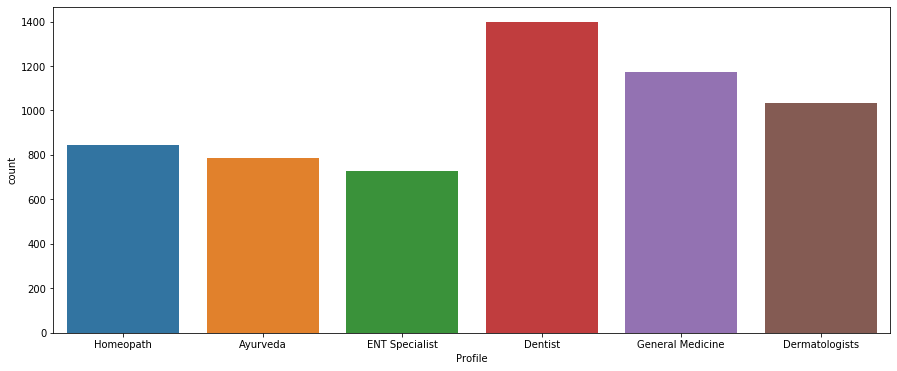

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(dtn['Profile'])

Maximun number of profile have Dentist and then General Medicine.

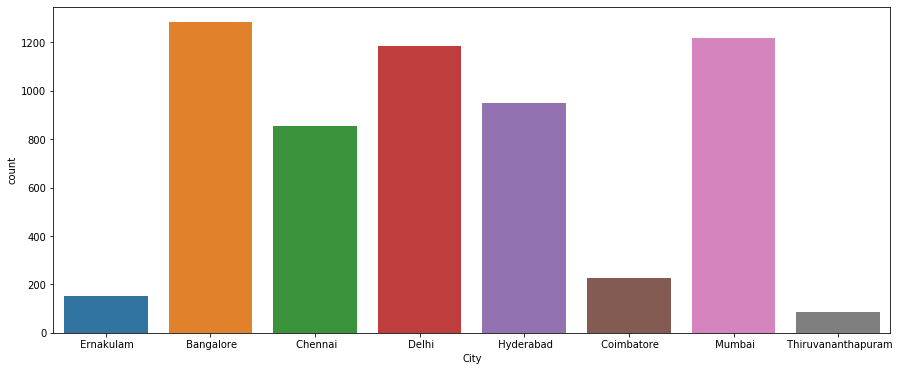

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(dtn['City'])

Maximum number of doctors details from Bangalore and Mumbai.

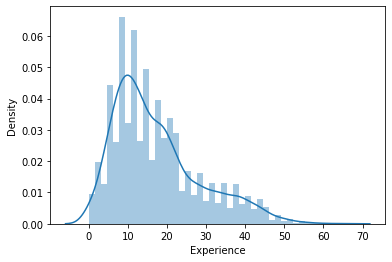

In [49]:
sns.distplot(dtn['Experience'])

Experience is quite right skewed.

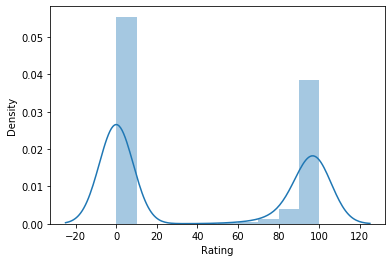

In [50]:
sns.distplot(dtn['Rating'])

Here we can see that maximum spike at 0 because we fill all the null value with 0 since null values are in high percentage.
Other than that maximum rating lies between 90 to 100.

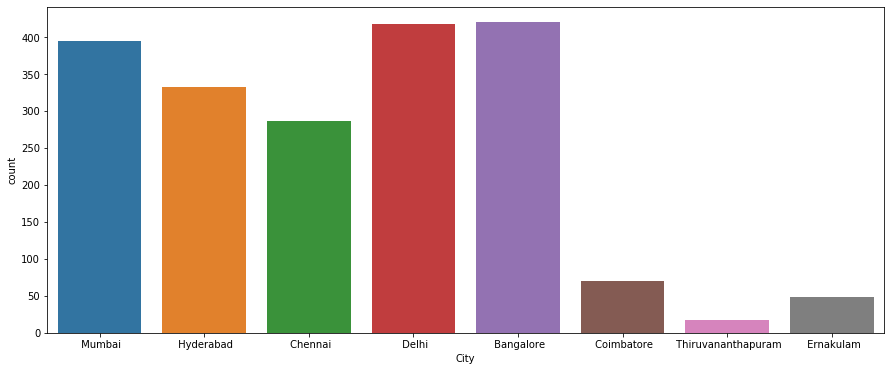

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(dts['City'])

In test dataset maximum information is from Delhi and Bangalore then Mumbai.

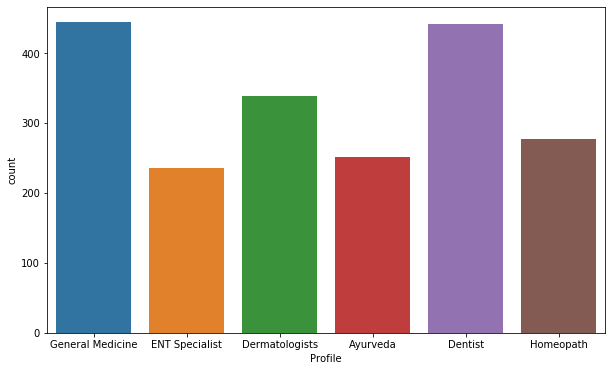

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(dts['Profile'])

In test data Dentist and Genaral Medicine profile are almost equal and then Dermatologists.

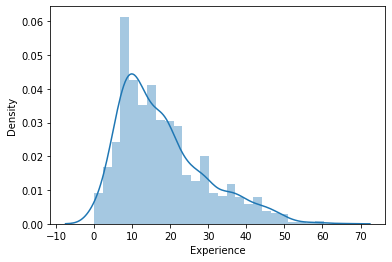

In [53]:
sns.distplot(dts['Experience'])

In test data Experience column is rightly skewed.

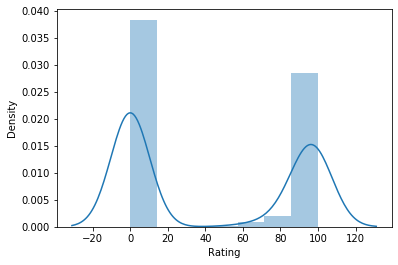

In [54]:
sns.distplot(dts['Rating'])

In [55]:
dtn.describe()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364
std,11.142798,47.340934,190.920373,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,96.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
dts.describe()

,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,17.874685,42.634122,0.492703,0.215400,0.124811,0.122295,0.098138,0.064419,0.049824,0.045294,0.042778,0.033719
std,11.366764,47.284014,0.500073,0.411203,0.330588,0.327709,0.297576,0.245559,0.217636,0.208001,0.202407,0.180551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,96.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Statistics of both train and test data are almost same.

### Encoding 

In [57]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
oe=OrdinalEncoder()
dtn['Place']=oe.fit_transform(dtn['Place'].values.reshape(-1,1))
dtn['Profile']=oe.fit_transform(dtn['Profile'].values.reshape(-1,1))
dtn['City']=oe.fit_transform(dtn['City'].values.reshape(-1,1))

In [59]:
dtn.head()

,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24.0,100.0,296.0,5.0,100,4.0,0,0,0,1,0,0,0,0,0,1
1,12.0,98.0,855.0,0.0,350,0.0,0,0,1,0,0,0,0,0,0,0
2,9.0,0.0,452.0,3.0,300,0.0,1,0,0,0,0,0,0,0,0,0
3,12.0,0.0,68.0,0.0,250,0.0,0,0,1,0,0,0,0,0,0,0
4,20.0,100.0,335.0,0.0,250,1.0,0,0,1,0,0,0,0,0,0,0


In [60]:
dts['Place']=oe.fit_transform(dts['Place'].values.reshape(-1,1))
dts['Profile']=oe.fit_transform(dts['Profile'].values.reshape(-1,1))
dts['City']=oe.fit_transform(dts['City'].values.reshape(-1,1))

In [61]:
dts.head()

,Experience,Rating,Place,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35.0,0.0,142.0,4.0,6.0,1,0,0,0,0,0,0,0,0,0
1,31.0,0.0,577.0,3.0,5.0,1,0,0,0,0,0,0,0,1,0
2,40.0,70.0,212.0,2.0,1.0,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,373.0,0.0,3.0,0,0,0,1,0,0,0,0,0,0
4,16.0,100.0,231.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0


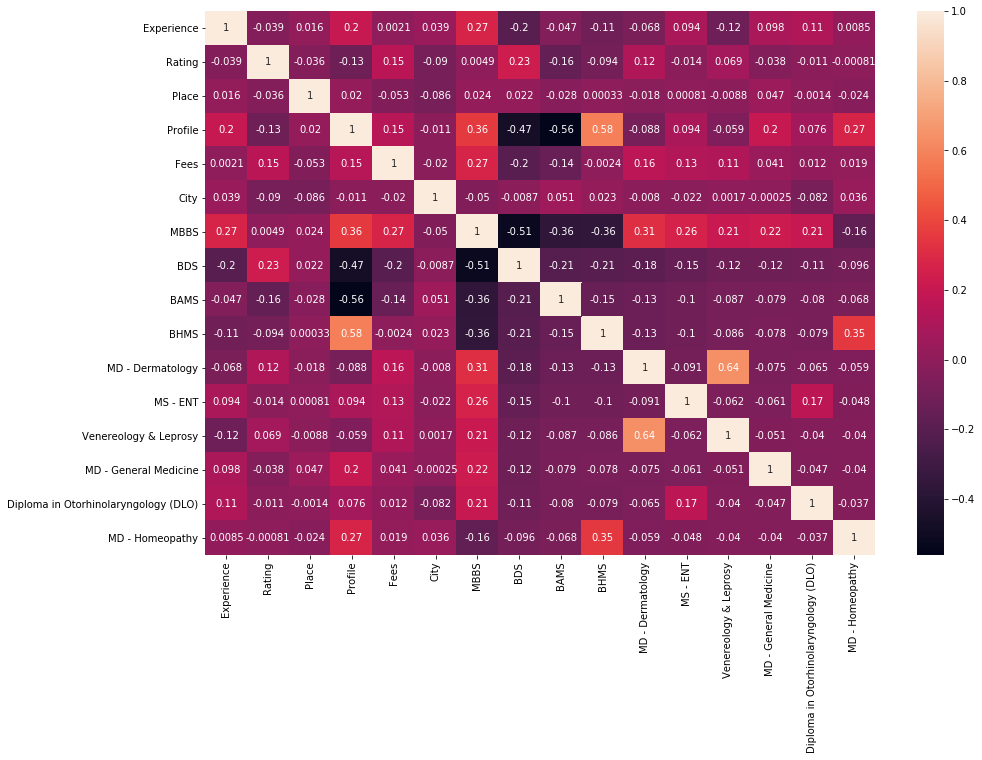

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(dtn.corr(),annot=True)

Fees column is quite good correlated with MBBS column as compare to other columns.
Profile is good correlated to BHMS,BAMS,BDS and MBBS.

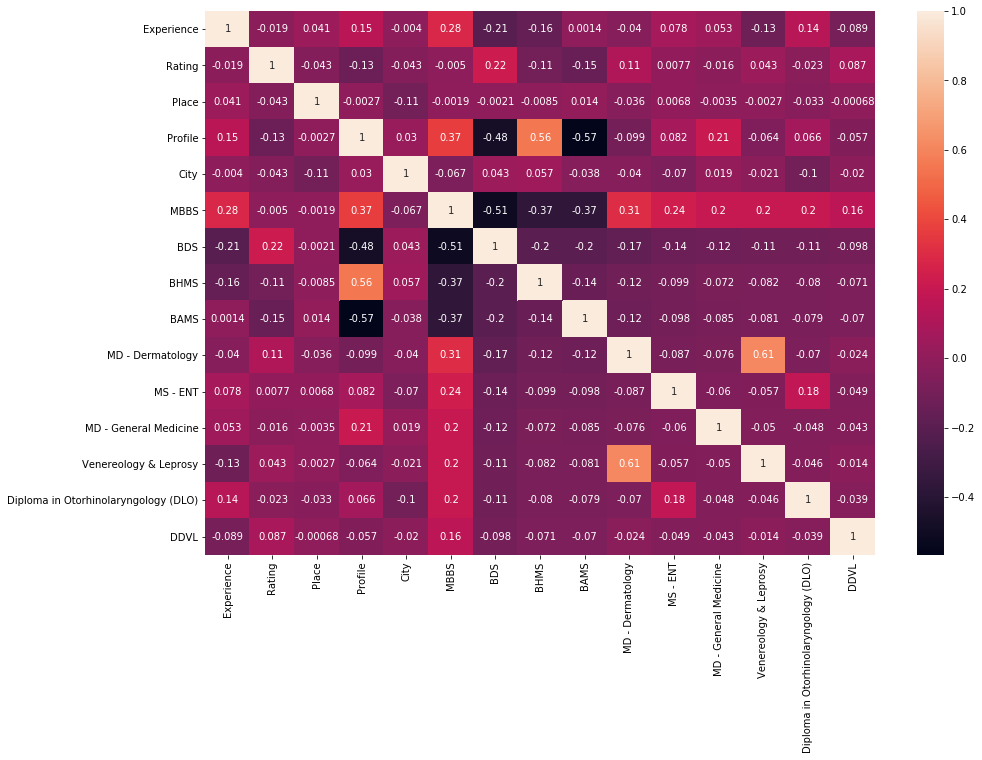

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(dts.corr(),annot=True)

### Checking for outliers

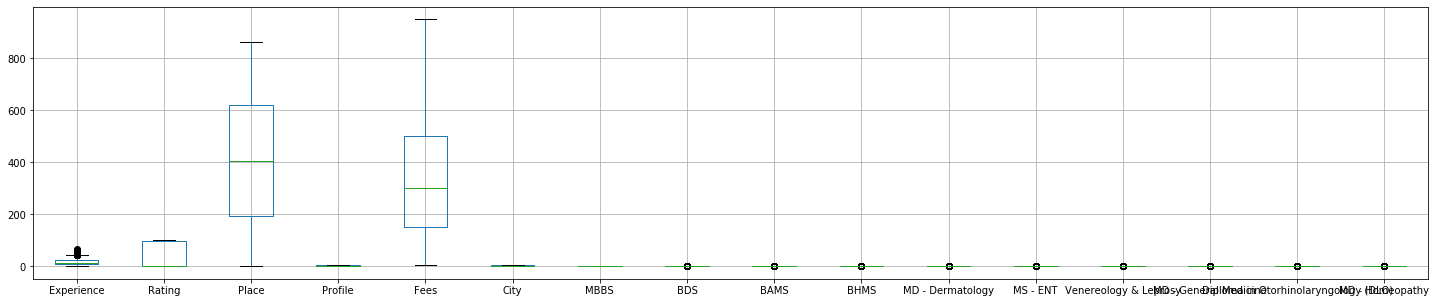

In [64]:
plt.figure(figsize=(25,5))
dtn.boxplot()
plt.show()

experience have some outliers. We try to remove it.

We try to remove outliers with zscore but from that process we lost almost 23% of data, so we are going to use capping using IQR.

### Capping using IQR

In [65]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [66]:
iqr_cap(dtn,dtn.columns,1.5)

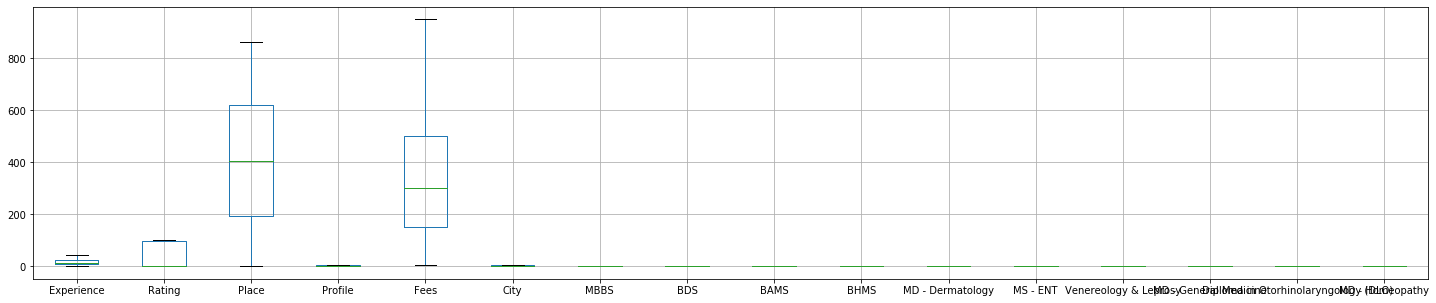

In [67]:
plt.figure(figsize=(25,5))
dtn.boxplot()
plt.show()

Here we remove all the outliers.

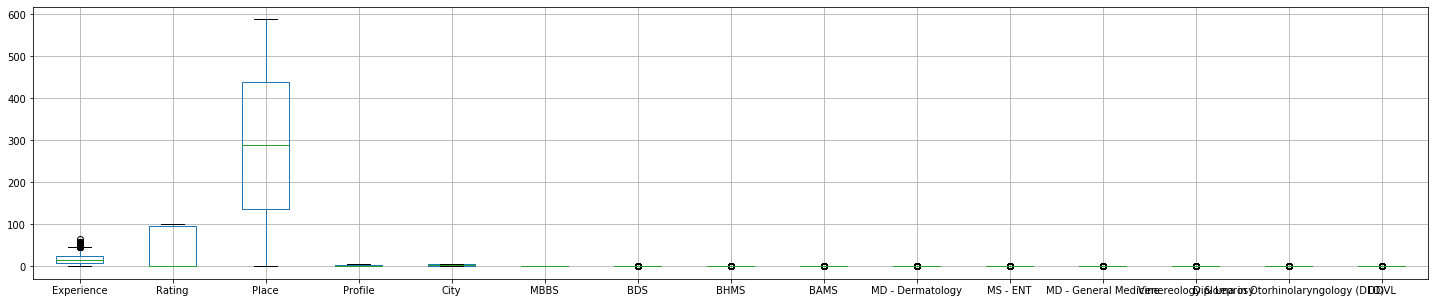

In [68]:
plt.figure(figsize=(25,5))
dts.boxplot()
plt.show()

In [69]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [70]:
iqr_cap(dts,dts.columns,1.5)

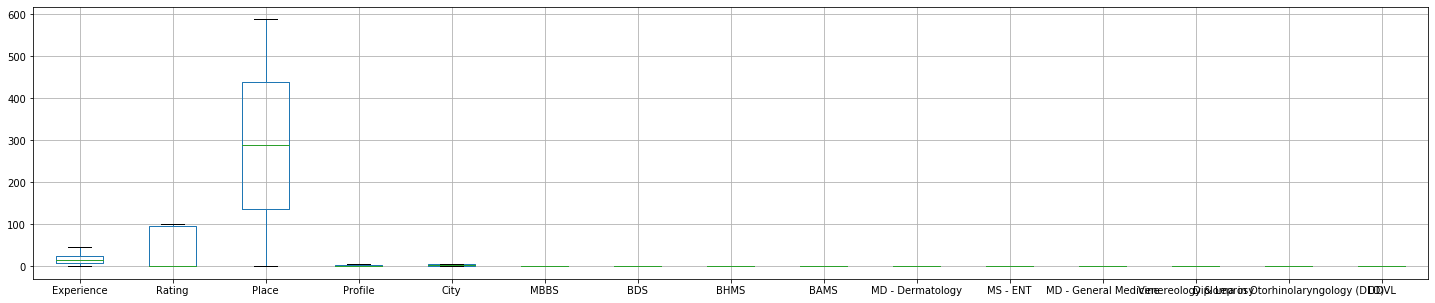

In [71]:
plt.figure(figsize=(25,5))
dts.boxplot()
plt.show()

From test dataset also we remove the outliers.

### Checking for skewness

In [72]:
dtn.skew()

Experience                              0.847515
Rating                                  0.247186
Place                                   0.121514
Profile                                 0.108803
Fees                                    0.751870
City                                    0.003110
MBBS                                    0.118000
BDS                                     0.000000
BAMS                                    0.000000
BHMS                                    0.000000
MD - Dermatology                        0.000000
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
dtype: float64

In [73]:
dts.skew()

Experience                              0.849281
Rating                                  0.225321
Place                                   0.041189
Profile                                 0.028926
City                                   -0.009157
MBBS                                    0.029215
BDS                                     0.000000
BHMS                                    0.000000
BAMS                                    0.000000
MD - Dermatology                        0.000000
MS - ENT                                0.000000
MD - General Medicine                   0.000000
Venereology & Leprosy                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
DDVL                                    0.000000
dtype: float64

both dataset have skewness in same column which is Experience. Now we try to remove it.

In [74]:
dtn['Experience']=np.sqrt(dtn['Experience'])

In [75]:
dtn.skew()

Experience                              0.010169
Rating                                  0.247186
Place                                   0.121514
Profile                                 0.108803
Fees                                    0.751870
City                                    0.003110
MBBS                                    0.118000
BDS                                     0.000000
BAMS                                    0.000000
BHMS                                    0.000000
MD - Dermatology                        0.000000
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
dtype: float64

In [76]:
dts['Experience']=np.sqrt(dts['Experience'])

In [77]:
dts.skew()

Experience                             -0.009384
Rating                                  0.225321
Place                                   0.041189
Profile                                 0.028926
City                                   -0.009157
MBBS                                    0.029215
BDS                                     0.000000
BHMS                                    0.000000
BAMS                                    0.000000
MD - Dermatology                        0.000000
MS - ENT                                0.000000
MD - General Medicine                   0.000000
Venereology & Leprosy                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
DDVL                                    0.000000
dtype: float64

We sucessfuly removed the skewness from the both dataset.

### Spliting the data into train and test

In [78]:
x=dtn.drop('Fees',axis=1)
x.head()

,Experience,Rating,Place,Profile,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,4.898979,100.0,296.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.464102,98.0,855.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.000000,0.0,452.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.464102,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.472136,100.0,335.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
x=pd.get_dummies(x,columns=['Profile','City'])

In [80]:
x.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,Profile_4.0,Profile_5.0,City_0.0,City_1.0,City_2.0,City_3.0,City_4.0,City_5.0,City_6.0,City_7.0
0,4.898979,100.0,296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,3.464102,98.0,855.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,3.000000,0.0,452.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,3.464102,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,4.472136,100.0,335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
y=dtn['Fees'].copy()
y.head()

0    100.0
1    350.0
2    300.0
3    250.0
4    250.0
Name: Fees, dtype: float64

In [82]:
dts=pd.get_dummies(dts,columns=['Profile','City'])

In [83]:
dts.head()

,Experience,Rating,Place,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,...,Profile_4.0,Profile_5.0,City_0.0,City_1.0,City_2.0,City_3.0,City_4.0,City_5.0,City_6.0,City_7.0
0,5.916080,0.0,142.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,5.567764,0.0,577.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,6.324555,70.0,212.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,0.0,373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,4.000000,100.0,231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


### Scaling 

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
ss=StandardScaler()

In [86]:
x['Experience']=ss.fit_transform(x['Experience'].values.reshape(-1,1))
x['Rating']=ss.fit_transform(x['Rating'].values.reshape(-1,1))
x['Place']=ss.fit_transform(x['Place'].values.reshape(-1,1))

In [87]:
x.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,Profile_4.0,Profile_5.0,City_0.0,City_1.0,City_2.0,City_3.0,City_4.0,City_5.0,City_6.0,City_7.0
0,0.728628,1.220669,-0.446941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,-0.344028,1.178419,1.744386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,-0.690971,-0.891845,0.164592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,-0.344028,-0.891845,-1.340720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.409537,1.220669,-0.294058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [88]:
dts['Experience']=ss.fit_transform(dts['Experience'].values.reshape(-1,1))
dts['Rating']=ss.fit_transform(dts['Rating'].values.reshape(-1,1))
dts['Place']=ss.fit_transform(dts['Place'].values.reshape(-1,1))

In [89]:
dts.head()

,Experience,Rating,Place,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,...,Profile_4.0,Profile_5.0,City_0.0,City_1.0,City_2.0,City_3.0,City_4.0,City_5.0,City_6.0,City_7.0
0,1.419018,-0.901887,-0.843346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,1.161792,-0.901887,1.665635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1.720672,0.578901,-0.439602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,-2.949927,-0.901887,0.489009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.004019,1.213525,-0.330014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


## Training the model

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=41)

In [91]:
x_test.shape

(1312, 27)

In [92]:
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
sv=SVR()
kn=KNeighborsRegressor()
ad=AdaBoostRegressor()

In [93]:
from xgboost import XGBRegressor
xg=XGBRegressor()

In [94]:
# for random forest regressor

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predrf)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predrf))))

RMSE 173.49421932257295
RMSLE 5.15614428080634


In [95]:
# for decision tree regressor

dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,preddt)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,preddt))))

RMSE 226.21941055995205
RMSLE 5.421505371494465


In [96]:
# for support vector regressor

sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predsv)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predsv))))

RMSE 186.95346478727447
RMSLE 5.230859734480989


In [97]:
# for kneighbors regressor

kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predkn)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predkn))))

RMSE 184.94796779819703
RMSLE 5.220074530373798


In [98]:
# for adaboost regressor

ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predad)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predad))))

RMSE 180.86795139715193
RMSLE 5.197767214722529


In [99]:
# for linear regressor

lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predlr)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predlr))))

RMSE 177.95455374227373
RMSLE 5.18152820163875


In [100]:
# for xgb regressor

xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predxg)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predxg))))

RMSE 175.24979183221447
RMSLE 5.166212338080696


In [101]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [102]:
ls=Lasso()
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predls)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predls))))

RMSE 178.69079250151427
RMSLE 5.185656895944333


In [103]:
rdg=Ridge()
rdg.fit(x_train,y_train)
predrdg=rdg.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predrdg)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predrdg))))

RMSE 177.95293384730397
RMSLE 5.181519098739676


In [104]:
el=ElasticNet()
el.fit(x_train,y_train)
predel=el.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predel)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predel))))

RMSE 184.61314886953676
RMSLE 5.218262548511161


We try to tune the parameter with that model whose RMSE and RMSLE are less.

### Hyperparameter tuning using GridSearchCV

In [105]:
# adaboost regressor

par={'n_estimators':(20,40,50,100,120),'learning_rate':[0.001,0.02,0.01,0.1],'loss':['linear','square','exponential']}

gcv=GridSearchCV(ad,par,cv=3)
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.02, 0.01, 0.1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': (20, 40, 50, 100, 120)})

In [106]:
gcv.best_params_

{'learning_rate': 0.02, 'loss': 'exponential', 'n_estimators': 120}

In [107]:
ada=AdaBoostRegressor(n_estimators=120,loss='exponential',learning_rate=0.02)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predada)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predada))))

RMSE 179.14195980680358
RMSLE 5.188178563072077


In [108]:
# kneighbors regressor

par={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':[-1],'leaf_size':[8,9,10,11,12]}
gcv=GridSearchCV(kn,par,cv=3)
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [8, 9, 10, 11, 12], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [109]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 8,
 'n_jobs': -1,
 'n_neighbors': 9,
 'weights': 'uniform'}

In [110]:
knr=KNeighborsRegressor(n_neighbors=9,weights='uniform',algorithm='auto',n_jobs=-1,leaf_size=8)
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predknr)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predknr))))

RMSE 178.00686496299411
RMSLE 5.181822116756222


In [124]:
# random forest regressor

par={'n_estimators':(100,150,200,230,250),'max_depth':np.arange(1,10),'max_features':['auto','sqrt','log2']}

gcv=GridSearchCV(rf,par,cv=3)
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200, 230, 250)})

In [125]:
gcv.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 250}

In [130]:
rfr=RandomForestRegressor(n_estimators=250,max_depth=9,max_features='sqrt')
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predrfr)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predrfr))))

RMSE 172.27044994726367
RMSLE 5.149065625327298


In [111]:
# linear regression

par={'fit_intercept':['True','False'],'normalize':['True','False']}
gcv=GridSearchCV(lr,par,cv=3)
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False']})

In [112]:
gcv.best_params_

{'fit_intercept': 'True', 'normalize': 'True'}

In [113]:
lrg=LinearRegression(fit_intercept=True,normalize=True)
lrg.fit(x_train,y_train)
predlrg=lrg.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predlrg)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predlrg))))

RMSE 178.05171256565035
RMSLE 5.182074028131056


In [114]:
# xgb regressor

par={'n_estimators':[100,120,150,180],'max_depth':range(1,8),'eta':[0.001,0.01,0.1,0.2]}
gcv=GridSearchCV(xg,par,cv=3)
gcv.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [115]:
gcv.best_params_

{'eta': 0.001, 'max_depth': 2, 'n_estimators': 120}

In [123]:
xgr=XGBRegressor(n_estimators=100,max_depth=6,eta=0.1)
xgr.fit(x_train,y_train)
predxgr=xgr.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,predxgr)))
print('RMSLE',np.log(np.sqrt(mean_squared_error(y_test,predxgr))))

RMSE 168.46692153701503
RMSLE 5.126739419167794


After tuning our best model is XGB Regressor having lowest RMSE AND RMSLE values among all other models.
So, we are going to save this model.

### Saving our Final Model

In [131]:
import joblib

In [132]:
joblib.dump(xgr,'doctor_con_fees_xgr.obj')

['doctor_con_fees_xgr.obj']

### Loading model for prediction

In [133]:
xgr_doctor_fees=joblib.load('doctor_con_fees_xgr.obj')

In [134]:
final_result=xgr_doctor_fees.predict(dts)
final_result

array([266.7761 , 343.6266 , 363.22098, ..., 281.5061 , 264.43103,
       328.02728], dtype=float32)